<h1 style="font-size: 36px; text-align: center !important">Projet IA [Human For You]</h1>


# Livrable : 

## Sous-titre: Livrable Technique - Présentation

---

### GROUP 04 
- LAGGOUNE Amine
- SACLIER Victor
- BOISEEL Arnaud



---

<center>
<img src='https://blog.integral-system.fr/wp-content/uploads/2020/02/33797061-1920x1359.jpg' />
</center>

---

### Date: [31/01/2024]



## Introduction



---

## Objectifs

- Préparation de notre jeux de données.


- Etude des différents modèles d'apprentissage.


- Le choix du modèle retenu (Avec justification).


- Nos résultats finaux avec proposition de pistes d'amélioration.

---

## Table des Matières

1. Chapitre 1
2. Chapitre 2
3. Chapitre 3
4. Conclusion

---







---

<center>
© [FISA  A5 INFO], [2024]
</center>


In [119]:
# imports
import os
import numpy as np
from numpy.random import default_rng
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sn
from sklearn.metrics import roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
# on filtre les warnings
warnings.filterwarnings('ignore')

# stabilité du notebook d'une exécution à l'autre
random = default_rng(42)

# Ajustement des tailles des labels graphiques utilisé dans le notebook
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Implementation des fonctions pour Importer, Lire et exporter les données de notre dataset

In [120]:
PROJECT_ROOT_DIR = "."
DATA_PATH = "datasets"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images") # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


def load_data(path, filename):
    file_path = os.path.join(path, filename)
    return pd.read_csv(file_path)

### Import des données issue des datasets
- __employee_data__ : Cette variable va contenir les informations générales des employées.
- __employee_survey__ : Cette variable va contenir les informations d'enquêtes des employées.
- __manager_survey__ : Cette variable va contenir les informations d'enquêtes des managers.
- __in_time__ et __out_time__ : Ces deux variables vont contenir les données du pointage des employées, càd, le temps d'entrée et de sortie de chaque employée.

In [121]:
employee_data = load_data(DATA_PATH, 'general_data.csv')
employee_survey = load_data(DATA_PATH, 'employee_survey_data.csv')
manager_survey = load_data(DATA_PATH, 'manager_survey_data.csv')
in_time = load_data(DATA_PATH, 'in_time.csv')
out_time = load_data(DATA_PATH, 'out_time.csv')

# Analyse préliminaire
##  1- Analyse de données des horaires de travail

In [122]:
in_time.head(4)


,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,...,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,...,2015-12-11 09:46:49,2015-12-14 10:03:33,NaN,2015-12-16 10:21:19,NaN,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,NaN,2015-01-15 09:37:57,2015-01-16 09:57:18,2015-01-19 10:23:43,2015-01-20 09:29:03,...,2015-12-11 10:15:18,2015-12-14 10:00:01,2015-12-15 10:30:18,2015-12-16 10:01:18,2015-12-17 09:15:08,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,NaN,2015-01-15 09:55:11,2015-01-16 10:05:36,2015-01-19 09:47:53,2015-01-20 09:57:09,...,2015-12-11 09:49:55,2015-12-14 09:42:31,2015-12-15 09:54:48,2015-12-16 09:48:34,2015-12-17 09:53:17,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,NaN,2015-01-15 10:00:50,2015-01-16 09:58:06,2015-01-19 09:43:11,2015-01-20 10:29:06,...,2015-12-11 09:46:02,2015-12-14 10:20:36,2015-12-15 09:37:17,2015-12-16 10:22:09,2015-12-17 09:54:36,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15


In [123]:
in_time.info()
out_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


### 1.1Analyse du DataFrame `in_time`

### Structure Générale
- **Nombre d'Entrées (Lignes):** 4410
- **Nombre de Colonnes:** 262
- **Type de Données:** 
  - Numériques: `float64` (12 colonnes), `int64` (1 colonne)
  - Catégorielles/Textuelles: `object` (249 colonnes)



##  2- Analyse de données issue du service des ressources humaines

In [124]:
employee_data.head(1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0


In [125]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

### 2.1 Analyse du DataFrame `employee_data`  

### Aperçu Général
- **Entrées (Lignes):** 4410
- **Colonnes:** 24
- **Type de Données:** 
  - Numériques: `int64` et `float64`
  - Catégorielles: `object`

### Gestion des Données Manquantes
- **Colonnes avec Données Manquantes:** 
  - `NumCompaniesWorked` <span style="color:red;">(19 valeurs manquantes)</span>
  - `TotalWorkingYears` <span style="color:red;">(9 valeurs manquantes)</span>


### Détails des Colonnes
- **Variables Numériques:** 
  - Exemples: `Age`, `DistanceFromHome`, `Education`, `MonthlyIncome`
- **Variables Catégorielles:** 
  - Exemples: `Attrition`, `BusinessTravel`, `Department`
 



##  2- Analyse de données évaluation du manager &  Enquête qualité de vie au travail

In [126]:
manager_survey.head(1)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3


In [127]:
employee_survey.head(1)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0


In [128]:
manager_survey.info()
employee_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB



## Structure Générale
- **Nombre d'Entrées (Lignes):** 4410
- **Nombre de Colonnes:** 4
- **Types de Données:**
  - `int64`: 1 colonne (`EmployeeID`)
  - `float64`: 3 colonnes (`EnvironmentSatisfaction`, `JobSatisfaction`, `WorkLifeBalance`)

## Détails des Colonnes
- **`EmployeeID` (Intégralité des Données Présentes):**
  - 4410 valeurs non-nulles, identifiant unique pour chaque employé.
- **`EnvironmentSatisfaction` (25 Valeurs Manquantes):**
  - 4385 valeurs non-nulles, évaluation de la satisfaction environnementale (float).
- **`JobSatisfaction` (20 Valeurs Manquantes):**
  - 4390 valeurs non-nulles, évaluation de la satisfaction professionnelle (float).
- **`WorkLifeBalance` (38 Valeurs Manquantes):**
  - 4372 valeurs non-nulles, évaluation de l'équilibre travail-vie personnelle (float).



# Conclusion de l'Analyse Préliminaire

## Observations Clés
- Les DataFrames `in_time` et `out_time` **ne contiennent pas de colonne `EmployeeID`**. Cependant, ils incluent une colonne `Unnamed` qui, après examen, semble faire référence à l'`EmployeeID`.

- **Présence de Valeurs 'NaN'** : Ces valeurs sont observées dans certaines variables et pourraient être interprétées comme des jours où les employés étaient absents.

## Prochaines Étapes
- **Calcul du Temps Moyen Passé en Entreprise** : L'objectif immédiat est de calculer la durée moyenne de présence des employés sur le lieu de travail.

- **Fusion des Données** : Après avoir calculé cette métrique, nous prévoyons de fusionner `in_time`, `out_time` et d'autres informations pertinentes dans **un seul et unique DataFrame**. Ce processus facilitera une analyse globale et détaillée des données des employés.



On fait une copie de `in_time` et `out_time`  pour eviter de modifier les originaux 

In [129]:
InTime_copy = in_time.copy()
OutTime_copy = out_time.copy()

In [130]:
InTime_copy.rename(columns={InTime_copy.columns[0]: 'EmployeeID'}, inplace=True)
OutTime_copy.rename(columns={OutTime_copy.columns[0]: 'EmployeeID'}, inplace=True)

In [131]:
for date in InTime_copy.columns[1:]:  # en supposant que la première colonne est EmployeeID
    InTime_copy[date] = pd.to_datetime(InTime_copy[date])
    OutTime_copy[date] = pd.to_datetime(OutTime_copy[date])

    # Remplacer NaN par 0 avant de calculer la différence
    InTime_copy[date].fillna(pd.Timedelta(seconds=0), inplace=True)
    OutTime_copy[date].fillna(pd.Timedelta(seconds=0), inplace=True)

    InTime_copy[date] = (OutTime_copy[date] - InTime_copy[date]).dt.total_seconds() / 3600


In [132]:
InTime_copy.head()

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,...,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,0.0,7.208333,7.189722,7.410833,7.006667,7.289722,7.484444,7.262778,7.831111,0.0,7.346944,7.267500,0.000000,6.775833,...,7.651944,7.538889,0.000000,7.551944,0.000000,0.000000,7.339167,7.395833,6.504722,7.596389,0.0,7.773889,7.315000,7.778889,7.080278
1,2,0.0,8.109167,7.454722,0.000000,7.396944,7.416667,7.150833,7.611389,7.278889,0.0,7.613056,7.727500,7.577500,7.602778,...,7.458056,7.536111,7.435278,8.255278,7.928333,7.903056,7.753889,7.712222,7.435556,0.000000,0.0,7.614722,7.982500,7.986111,8.227222
2,3,0.0,6.692500,7.265556,6.405278,6.765000,7.345000,6.861389,7.418611,6.999722,0.0,7.438333,7.210278,7.072222,6.920556,...,7.199444,7.096389,6.751111,6.902778,7.218333,6.785833,7.163611,6.801667,6.730278,6.849722,0.0,7.023889,7.438889,7.538889,6.786389
3,4,0.0,7.338333,7.291944,6.943056,6.919444,6.850833,7.193056,6.998611,7.306389,0.0,6.876667,6.907778,6.518611,7.178889,...,6.966667,7.055833,6.999444,7.313056,7.455833,7.629167,6.846667,7.326389,7.413611,7.085000,0.0,7.447222,7.416667,7.366389,7.133056
4,5,0.0,8.055556,7.988056,7.682500,7.806111,7.662222,7.721667,8.365000,8.257222,0.0,8.260000,8.403611,0.000000,7.815278,...,8.695833,7.589444,8.193056,8.129444,8.320000,7.903611,7.665000,7.957500,7.786944,8.249444,0.0,7.662222,8.268611,7.953333,8.018056


In [133]:
# Calcul de la moyenne
average_presence = InTime_copy.iloc[:, 1:].mean(axis=1)
average_presence_df = pd.DataFrame({'EmployeeID': InTime_copy['EmployeeID'], 'AveragePresence': average_presence})

In [134]:
# Fusion avec general_data
merged_data_with_time = employee_data.merge(average_presence_df, on='EmployeeID')
merged_data_with_survey = merged_data_with_time.merge(manager_survey, on='EmployeeID')
general_dataset =  merged_data_with_survey.merge(employee_survey,on='EmployeeID')

In [135]:
general_dataset.info()
general_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AveragePresence,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,6.978070,2.729932,3.153741,2.723603,2.728246,2.761436
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,1.269584,0.711400,0.360742,1.092756,1.101253,0.706245
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.167828,1.000000,3.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,5.990699,2.000000,3.000000,2.000000,2.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,6.688821,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,7.537530,3.000000,3.000000,4.000000,4.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,10.434399,4.000000,4.000000,4.000000,4.000000,4.000000


On remarque aussi que certain collaborateur ont un post qui n'est pas en adéquation avec leur parcours scolaire. ce qui peu étres un paramétre intéressant à prendre en compte
c'est pour cela qu'on a pris soin de rajouter 

In [136]:
unique_job_roles = general_dataset['EducationField'].unique()
general_data_copy = general_dataset.copy()

compatibility_dict = {
    "Life Sciences": ["Healthcare Representative", "Laboratory Technician", "Research Scientist", "Research Director"],
    "Medical": ["Healthcare Representative", "Laboratory Technician", "Research Scientist", "Research Director"],
    "Marketing": ["Sales Executive", "Sales Representative"],
    "Technical Degree": ["Research Scientist", "Manufacturing Director", "Laboratory Technician"],
    "Human Resources": ["Human Resources"],
    "Other": ["Sales Executive", "Human Resources", "Research Scientist", "Manager"],
    
}
def check_compatibility(row):
    compatible_roles = compatibility_dict.get(row['EducationField'], [])
    if row['JobRole'] in compatible_roles:
        return 1
    return 0

general_data_copy['JobCompatibility'] = general_data_copy.apply(check_compatibility, axis=1)

In [152]:
## PIPELINE
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
GeneralDataDF =general_data_copy.copy()
# 1) Data Cleaning and Preprocessing
GeneralDataDF['Attrition'] = GeneralDataDF['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
X_Features = GeneralDataDF.drop('Attrition', axis=1)
Y_Target = GeneralDataDF['Attrition']

numerical_cols = X_Features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = ['BusinessTravel', 'Department' , 'EducationField', 'Gender', 'JobRole']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

## Appliquer la transformation

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=500))
])
model_pipeline_RFC = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
Features_train, Features_test, Target_train, Target_test = train_test_split(X_Features, Y_Target, stratify=Y_Target , test_size=0.2, random_state=42)


model_pipeline.fit(Features_train, Target_train)
model_pipeline_RFC.fit(Features_train, Target_train)
# STEP 3: Predict on the Test Set
predictions = model_pipeline.predict(Features_test)
predictions_RFC = model_pipeline_RFC.predict(Features_test)

print("Accuracy sur l'ensemble de test:", accuracy_score(Target_test, predictions))
print("Accuracy sur l'ensemble de test:", accuracy_score(Target_test, predictions_RFC))

Accuracy sur l'ensemble de test: 0.8582766439909297
Accuracy sur l'ensemble de test: 0.9886621315192744


In [149]:
GeneralDataDF.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AveragePresence,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobCompatibility
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,6.554356,3,3,3.0,4.0,2.0,1
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,6.979604,2,4,3.0,2.0,4.0,1
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,6.502698,3,3,2.0,2.0,1.0,1
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,6.477067,2,3,4.0,4.0,3.0,0
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,7.515375,3,3,4.0,1.0,3.0,0


In [ ]:
pd.set_option('display.max_columns', 31)

hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', dtype='int64')
general_data_copy['Attrition'] = general_data_copy['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
general_data_copy['Gender'] = general_data_copy['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
## general_data_copy['MaritalStatus'] = general_data_copy['MaritalStatus'].apply(lambda x: 1 if x == 'Married' else (2 if x == "Single" else 0))
general_data_copy['BusinessTravel'] = general_data_copy['BusinessTravel'].apply(lambda x: 0 if x == 'Non-Travel' else (1 if x == 'Travel_Rarely' else 2))

general_data_copy = pd.concat([general_data_copy, pd.DataFrame(hot_encoder.fit_transform(general_data_copy[['EducationField']]), columns=hot_encoder.get_feature_names_out(['EducationField']))], axis=1).drop(columns=['EducationField'])
general_data_copy = pd.concat([general_data_copy, pd.DataFrame(hot_encoder.fit_transform(general_data_copy[['Department']]), columns=hot_encoder.get_feature_names_out(['Department']))], axis=1).drop(columns=['Department'])
general_data_copy = pd.concat([general_data_copy, pd.DataFrame(hot_encoder.fit_transform(general_data_copy[['JobRole']]), columns=hot_encoder.get_feature_names_out(['JobRole']))], axis=1).drop(columns=['JobRole'])

general_data_copy.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeCount,EmployeeID,Gender,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,...,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Human Resources,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,51,0,1,6,2,1,1,0,1,Married,131160,1.0,Y,11,8,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
1,31,1,2,10,1,1,2,0,1,Single,41890,0.0,Y,23,8,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,32,0,2,17,4,1,3,1,4,Married,193280,1.0,Y,15,8,...,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
3,38,0,0,2,5,1,4,1,3,Married,83210,3.0,Y,11,8,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,32,0,1,10,1,1,5,1,1,Single,23420,4.0,Y,12,8,...,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'BusinessTravel'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeID'}>],
       [<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'StandardHours'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>],
       [<AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsSinceLa

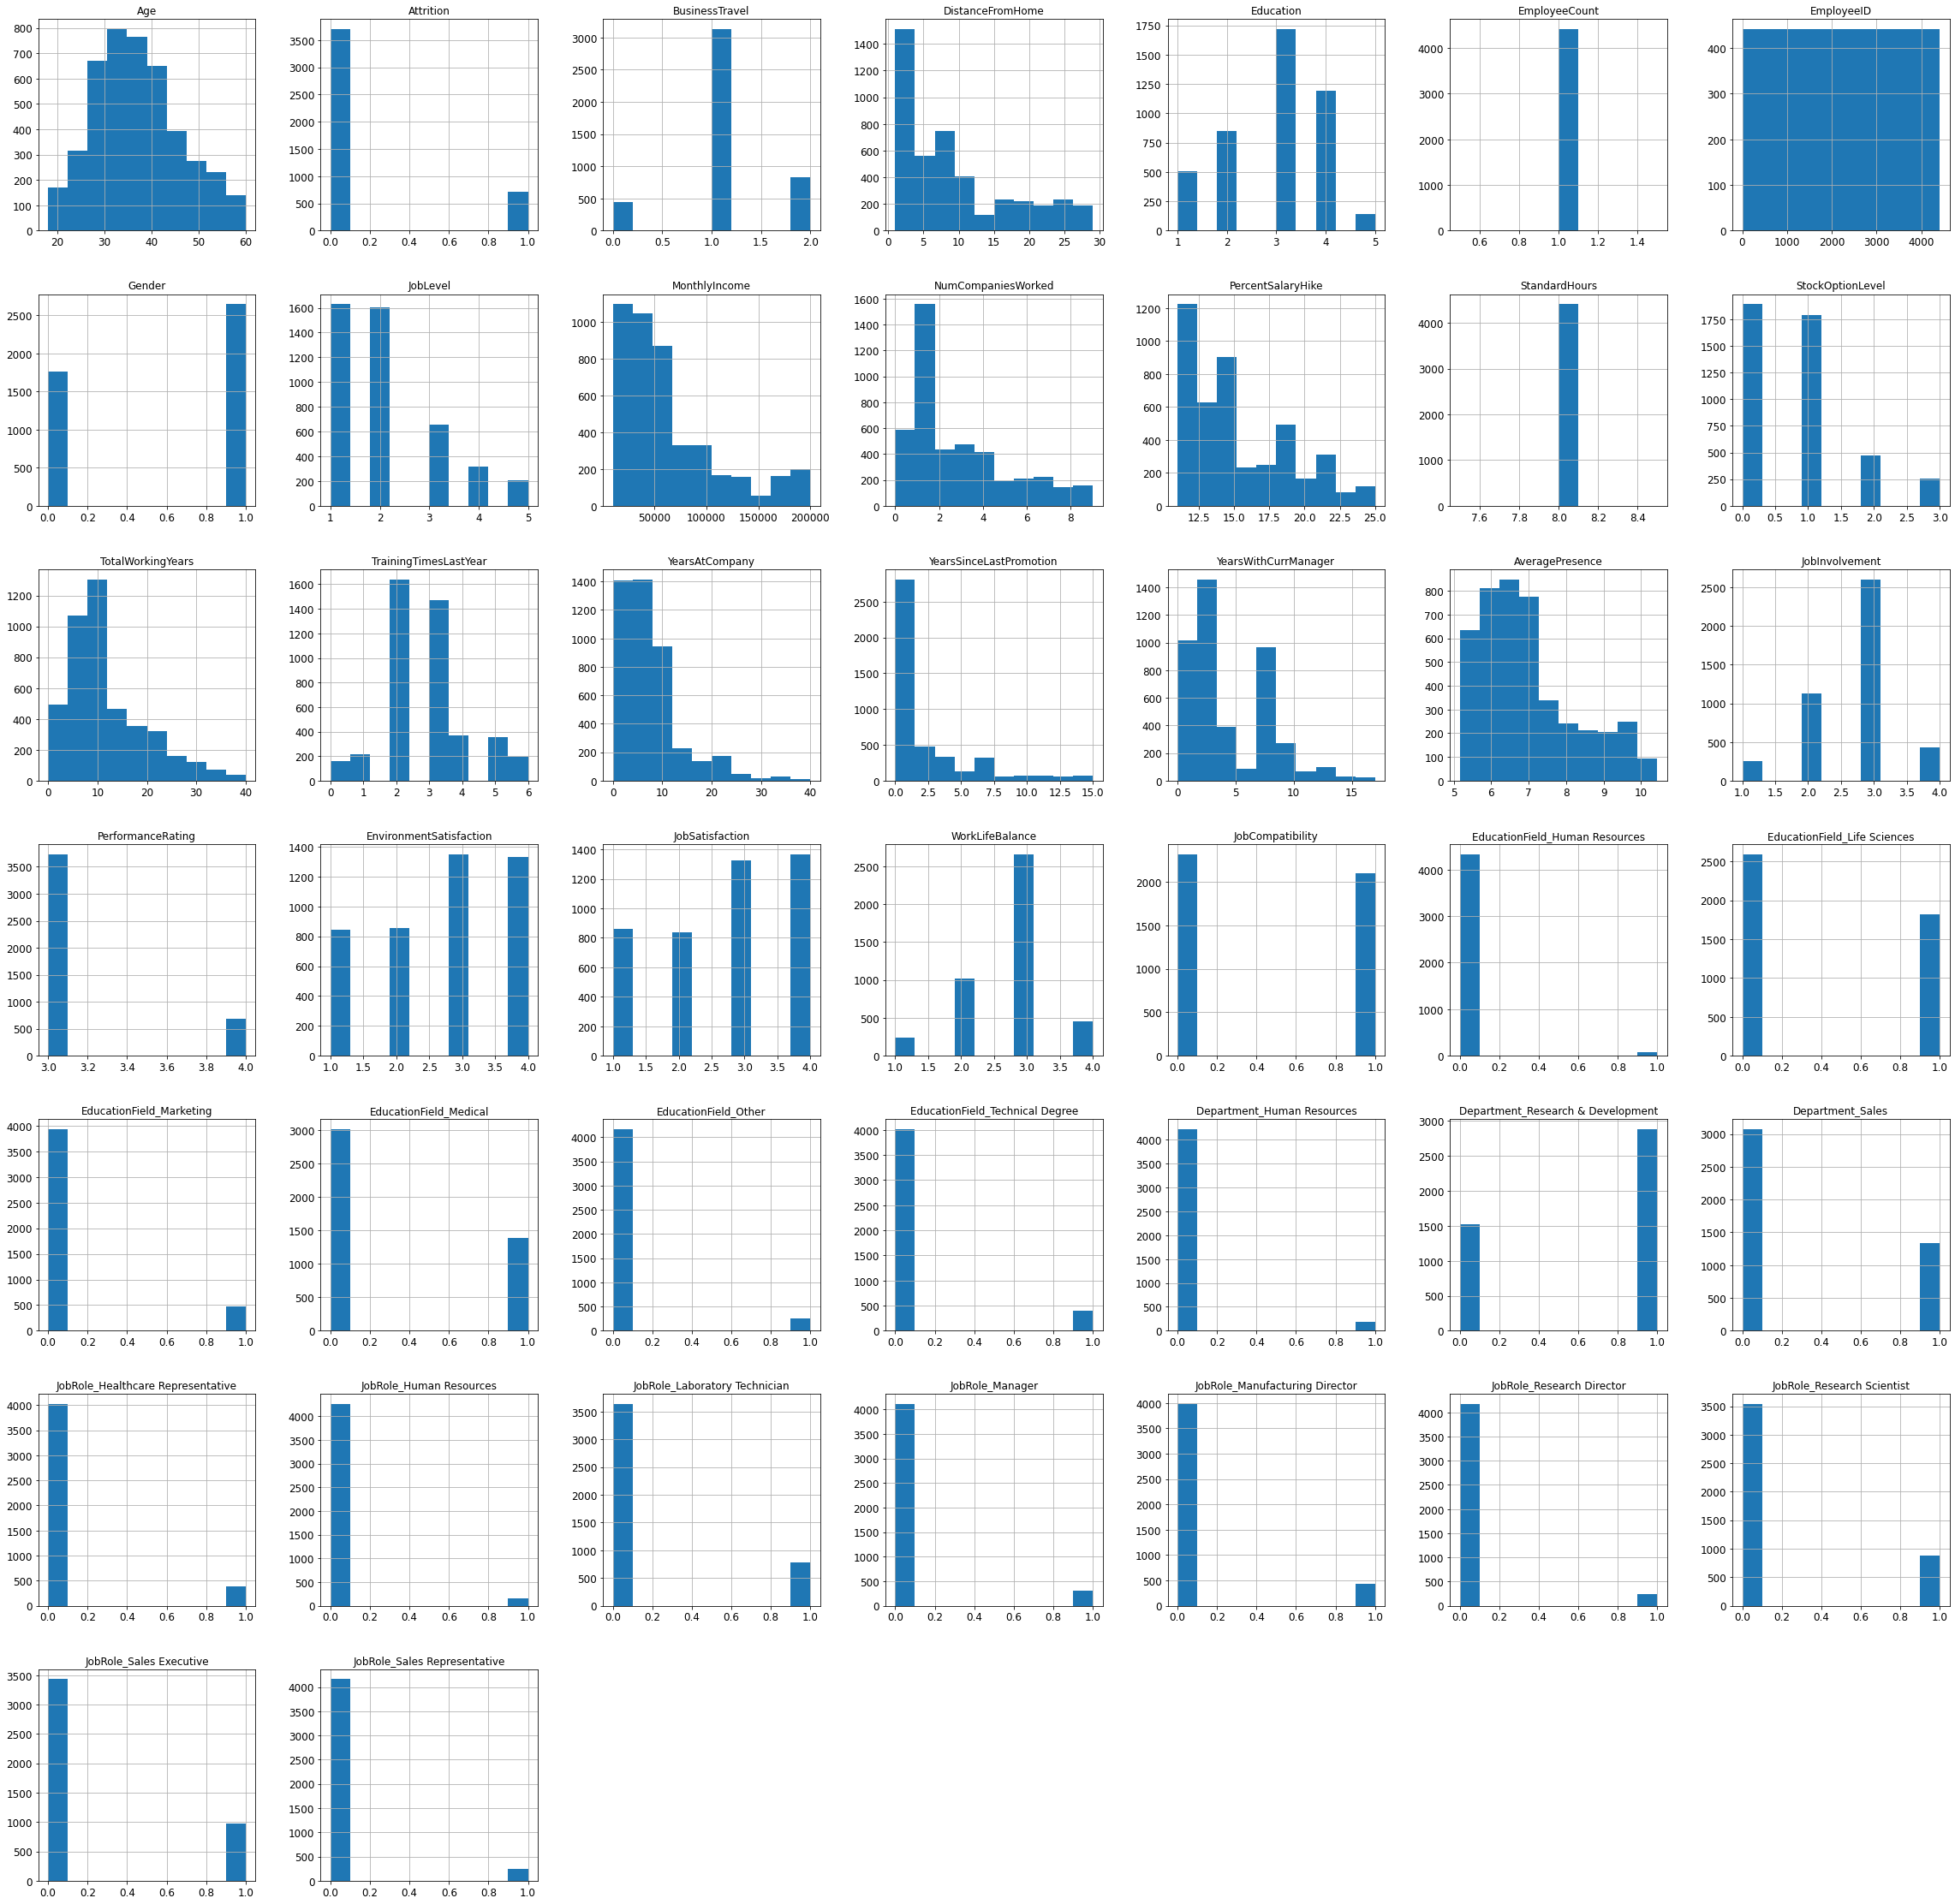

In [ ]:
general_data_copy.hist(figsize=(40, 40))

In [ ]:
# Identifier les colonnes avec des valeurs constantes
cols_to_drop = [col for col in general_data_copy.columns if general_data_copy[col].nunique() == 1]
# Supprimer ces colonnes du DataFrame
general_data_copy.drop(cols_to_drop, axis=1, inplace=True)
general_data_copy.drop(["MaritalStatus"], axis=1, inplace=True)

# Afficher les colonnes à supprimer
print(f"Colonnes à supprimer car elles contiennent des valeurs constantes : {cols_to_drop}")


Colonnes à supprimer car elles contiennent des valeurs constantes : ['EmployeeCount', 'Over18', 'StandardHours']


Imputer les valeurs manquantes,  en utilisant la méthode de remplacement par la moyenne pour chaque variable./*
Transformation les variable catégorielle  en numérique.

In [ ]:
imputer = SimpleImputer(strategy='mean')
cols_to_impute = ['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
general_data_copy[cols_to_impute] = imputer.fit_transform(general_data_copy[cols_to_impute])
general_data_copy.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   Attrition                          4410 non-null   int64  
 2   BusinessTravel                     4410 non-null   int64  
 3   DistanceFromHome                   4410 non-null   int64  
 4   Education                          4410 non-null   int64  
 5   EmployeeID                         4410 non-null   int64  
 6   Gender                             4410 non-null   int64  
 7   JobLevel                           4410 non-null   int64  
 8   MonthlyIncome                      4410 non-null   int64  
 9   NumCompaniesWorked                 4410 non-null   float64
 10  PercentSalaryHike                  4410 non-null   int64  
 11  StockOptionLevel                   4410 non-null   int64

Maintenant que toutes nos colonne sont normalisé, on peu procéder à l'affichage de la matrice de corrélation
Elle est représentée grâce à un dégradé de couleurs. Les valeurs de corrélation peuvent varier entre -1 (corrélation négative parfaite) et 1 (corrélation positive parfaite), avec des valeurs proches de zéro indiquant une absence de corrélation. La palette de couleurs utilisée pour le dégradé facilite la visualisation des valeurs de corrélation, où les couleurs plus claires reflètent une corrélation plus forte et les couleurs plus foncées indiquent une corrélation plus faible

In [ ]:
data_corr = general_data_copy.corr()
display(data_corr.style.background_gradient(cmap="Blues"))

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AveragePresence,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobCompatibility,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Human Resources,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
Age,1.000000,-0.159205,-0.011807,0.006963,-0.035706,0.008649,-0.039352,-0.002884,-0.044314,0.298528,-0.033137,-0.031753,0.680419,-0.027308,0.311309,0.216513,0.202089,-0.000377,0.018196,-0.025563,0.010073,-0.003081,-0.021191,0.021060,-0.047678,-0.001790,-0.032831,0.009673,-0.001543,0.046655,-0.007062,0.018040,-0.015558,-0.051511,0.001194,0.033969,0.009020,0.001261,-0.016059,0.005834,0.008219,-0.014096
Attrition,-0.159205,1.000000,0.127006,-0.009730,-0.015111,-0.004729,0.018125,-0.010290,-0.031176,0.042232,0.032533,-0.006839,-0.170111,-0.049431,-0.134392,-0.033019,-0.156199,0.198890,-0.015588,0.023403,-0.101795,-0.102743,-0.062561,-0.001981,0.091573,0.012394,-0.003780,0.000764,-0.025958,-0.040646,0.080768,-0.015307,-0.019742,-0.013768,-0.013857,0.001179,-0.017798,-0.045770,0.049760,0.027460,0.010869,-0.011073
BusinessTravel,-0.011807,0.127006,1.000000,0.014130,0.007567,-0.003737,-0.021404,0.013727,-0.055905,-0.030542,-0.025727,0.004770,0.008314,-0.043173,0.005212,0.005222,-0.000229,0.049254,0.025705,-0.019587,-0.009985,0.008921,0.004957,-0.000777,-0.022214,-0.039889,0.054607,0.030025,-0.000470,-0.028644,-0.002796,-0.053821,0.056932,0.003062,0.003513,-0.011332,0.000945,0.036336,0.017409,0.008887,-0.022053,-0.028647
DistanceFromHome,0.006963,-0.009730,0.014130,1.000000,-0.008638,-0.001097,-0.044173,-0.037329,-0.021607,-0.013818,0.038125,0.011169,0.009361,-0.009001,0.031684,0.002290,0.021584,0.009928,-0.001837,0.036418,0.020109,-0.011119,0.007961,0.032884,0.030508,0.009607,0.005240,-0.008728,-0.014552,-0.010691,-0.024506,0.007409,0.003129,-0.016564,0.001813,0.052249,-0.038859,0.000305,-0.003849,-0.002360,-0.012479,0.005463
Education,-0.035706,-0.015111,0.007567,-0.008638,1.000000,-0.009680,-0.016547,0.045746,0.006410,-0.016219,-0.040531,0.001261,-0.010712,0.010472,0.006080,0.022490,0.005358,0.001406,-0.018279,-0.035591,-0.045317,-0.004160,-0.006388,-0.029568,-0.018057,0.006435,-0.008889,-0.020869,0.046729,0.003472,0.014716,-0.007431,0.001207,-0.013044,0.045063,-0.077518,0.044142,-0.011976,0.049694,0.000709,-0.004180,0.032320
EmployeeID,0.008649,-0.004729,-0.003737,-0.001097,-0.009680,1.000000,-0.013165,-0.003303,0.007338,-0.001114,-0.004456,-0.014254,-0.001061,-0.010191,0.004086,0.000256,0.008579,-0.010239,0.008591,-0.006892,0.000795,-0.001051,-0.001717,-0.021708,0.011833,-0.000302,-0.004620,-0.002975,0.003532,0.001983,0.021296,-0.014299,0.005417,0.002764,-0.008991,-0.008073,-0.001464,0.013529,-0.002202,-0.004666,0.001284,0.009162
Gender,-0.039352,0.018125,-0.021404,-0.044173,-0.016547,-0.013165,1.000000,-0.026854,0.007530,-0.066796,0.011841,0.019237,-0.027571,-0.030167,-0.017277,-0.021812,0.004438,0.003231,0.025768,0.051586,-0.023750,0.015811,-0.032577,0.042267,0.028956,0.006770,0.002683,-0.031072,0.004840,0.018457,0.008227,-0.010507,0.007249,-0.002924,0.006014,0.013121,-0.044809,-0.004657,0.000000,0.030628,-0.005348,-0.010829
JobLevel,-0.002884,-0.010290,0.013727,-0.037329,0.045746,-0.003303,-0.026854,1.000000,0.047316,-0.009844,0.010973,0.000993,-0.036934,-0.032500,-0.064219,-0.060811,-0.055251,0.011067,-0.012630,-0.002474,-0.024409,-0.018230,-0.027538,-0.008167,0.010409,0.009053,0.035297,-0

Maintenant, on regarde la corrélation de notre Target Attrition par rapport aux autre variables

In [ ]:

print(data_corr["Attrition"].sort_values(ascending=False))

Attrition                            1.000000
AveragePresence                      0.198890
BusinessTravel                       0.127006
EducationField_Human Resources       0.091573
Department_Human Resources           0.080768
JobRole_Research Director            0.049760
NumCompaniesWorked                   0.042232
PercentSalaryHike                    0.032533
JobRole_Research Scientist           0.027460
PerformanceRating                    0.023403
Gender                               0.018125
EducationField_Life Sciences         0.012394
JobRole_Sales Executive              0.010869
JobRole_Laboratory Technician        0.001179
EducationField_Medical               0.000764
JobCompatibility                    -0.001981
EducationField_Marketing            -0.003780
EmployeeID                          -0.004729
StockOptionLevel                    -0.006839
DistanceFromHome                    -0.009730
JobLevel                            -0.010290
JobRole_Sales Representative      

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

x = general_data_copy.drop(["Attrition"], axis=1).values
y = general_data_copy["Attrition"].values

train_index, test_index = list(split.split(x, y))[0]
x_train, y_train = x[train_index], y[train_index]
x_test, y_test = x[test_index], y[test_index]

Maintenant que notre Dataset est divisé, nous allons mettre en place un Dictionnaire pour stocker les résultats de chaque modél

## MODELS:
L'objecif du projet et de détérminer les caractérstiques "Features" X qui influe sur la sortie "Target" Y.
## NP : 
Notre sortie est de type discrete car elle peu avoir deux valeur pour rappel :
YES or No. nous somme face à un probleme de classification binnaire.
Les models à étudier sont : 
- Regression logistique
- Random Forest
- Arbre de décision

In [ ]:
from sklearn.metrics import auc


def plot_roc_curve(model, X_test, y_test, model_name='Model'):
    """
    Trace la courbe ROC et calcule l'AUC pour un modèle donné.
    
    Paramètres:
    - model : le modèle entraîné.
    - X_test : les caractéristiques de l'ensemble de test.
    - y_test : la variable cible de l'ensemble de test.
    - model_name : un nom descriptif pour le modèle (utilisé dans le titre du graphique).
    """
    # Prédiction des probabilités pour la classe positive
    probabilities = model.predict_proba(X_test)[:, 1]
    
    # Calcul des taux de vrais et faux positifs
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    
    # Calcul de l'AUC
    roc_auc = auc(fpr, tpr)
    
    # Tracer la courbe ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC (Area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    
    # Retourner l'AUC pour une utilisation ultérieure si nécessaire
    return roc_auc

In [ ]:
# Initialisation d'un dictionnaire pour stocker les performances
model_performance = {}


## Model : Regression logistique 

Accuracy: 0.8480725623582767
Confusion Matrix:
 [[731   9]
 [125  17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       740
           1       0.65      0.12      0.20       142

    accuracy                           0.85       882
   macro avg       0.75      0.55      0.56       882
weighted avg       0.82      0.85      0.80       882

Cross Validation 
 [0.83852691 0.8427762  0.83852691 0.83971631 0.83829787]


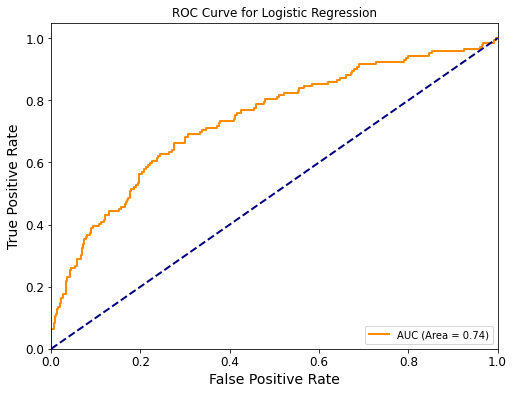

0.7364484202512371

In [ ]:

logistic_model = LogisticRegression(random_state=42, max_iter=2500)
cv_scores = cross_val_score(logistic_model, x_train, y_train, cv=5, scoring='accuracy')

logistic_model.fit(x_train, y_train)
predictions = logistic_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
print("Cross Validation \n", cv_scores)
# Stockage des performances dans le dictionnaire
model_performance['LogisticRegression'] = {
    'CV_Accuracy_Mean': cv_scores.mean(),
    'CV_Accuracy_Std': cv_scores.std(),
    'Test_Accuracy': accuracy_score(y_test, predictions),
    'ConfusionMatrix': confusion_matrix(y_test, predictions),
    'ClassificationReport': classification_report(y_test, predictions)
}

plot_roc_curve(logistic_model, x_test, y_test, model_name='Logistic Regression')

- 731 vrais négatifs (TN) : Le modèle a correctement prédit la non-attrition pour - 731 employés.
- 17 vrais positifs (TP) : Le modèle a correctement prédit l'attrition pour 17 employés.
- 9 faux positifs (FP) : Le modèle a incorrectement prédit l'attrition pour 9 employés (type I erreur).
- 125 faux négatifs (FN) : Le modèle a manqué d'identifier l'attrition pour 125 employés (type II erreur).

## Model : Random forest

Accuracy: 0.9909297052154195
Confusion Matrix:
 [[740   0]
 [  8 134]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       740
           1       1.00      0.94      0.97       142

    accuracy                           0.99       882
   macro avg       0.99      0.97      0.98       882
weighted avg       0.99      0.99      0.99       882

Cross Validation 
 [0.97733711 0.95892351 0.9674221  0.96879433 0.97304965]


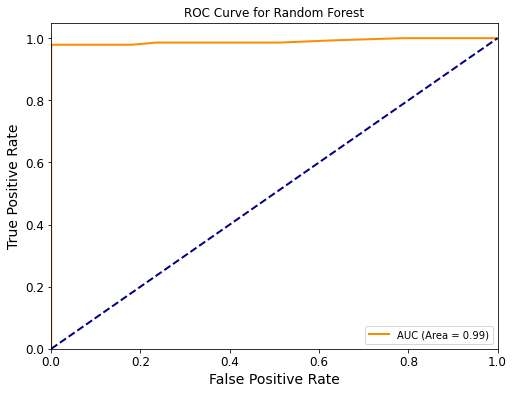

0.989493719071184

In [ ]:
from sklearn.metrics import pair_confusion_matrix


rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(x_train, y_train)
cv_scores_rf = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='accuracy')
rf_predictions = rf_model.predict(x_test)
# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Cross Validation \n", cv_scores_rf)

model_performance['RandomForest'] = {
    'CV_Accuracy_Mean': cv_scores_rf.mean(),
    'CV_Accuracy_Std': cv_scores_rf.std(),
    'Test_Accuracy': accuracy_score(y_test, rf_predictions),
    'ConfusionMatrix': confusion_matrix(y_test, rf_predictions),
    'ClassificationReport': classification_report(y_test, rf_predictions)
}
plot_roc_curve(rf_model, x_test, y_test, model_name='Random Forest')




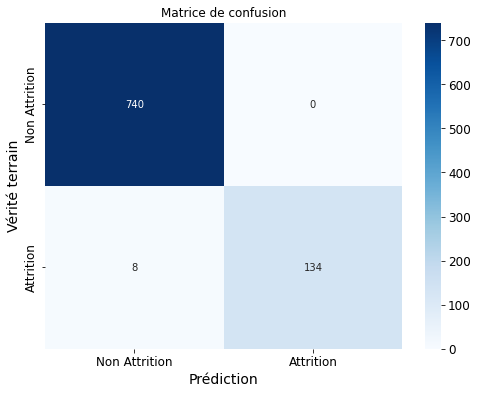

In [ ]:
conf_matrix = confusion_matrix(y_test, rf_predictions)
# Tracé de la matrice de confusion avec Seaborn
plt.figure(figsize=(8, 6))
sn.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', 
            xticklabels=['Non Attrition', 'Attrition'], 
            yticklabels=['Non Attrition', 'Attrition'])
plt.title('Matrice de confusion')
plt.ylabel('Vérité terrain')
plt.xlabel('Prédiction')
plt.show()

### Model SVM


In [ ]:
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)
cv_scores_svm = cross_val_score(svm_model, x_train, y_train, cv=5, scoring='accuracy')
svm_predictions = svm_model.predict(x_test)

model_performance['SVM'] = {
    'CV_Accuracy_Mean': cv_scores_svm.mean(),
    'CV_Accuracy_Std': cv_scores_svm.std(),
    'Test_Accuracy': accuracy_score(y_test, svm_predictions),
    'ConfusionMatrix': confusion_matrix(y_test, svm_predictions),
    'ClassificationReport': classification_report(y_test, svm_predictions)
}
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))
print("Cross Validation \n", cv_scores_svm)

Accuracy: 0.8390022675736961
Confusion Matrix:
 [[740   0]
 [142   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       740
           1       0.00      0.00      0.00       142

    accuracy                           0.84       882
   macro avg       0.42      0.50      0.46       882
weighted avg       0.70      0.84      0.77       882

Cross Validation 
 [0.83852691 0.83852691 0.83852691 0.83971631 0.83829787]


### Pré selection

In [ ]:
# Classement des modèles par précision moyenne de validation croisée
sorted_models = sorted(model_performance.items(), key=lambda x: x[1]['CV_Accuracy_Mean'], reverse=True)

for model, performance in sorted_models:
    print(f"{model}: CV Accuracy Moyenne = {performance['CV_Accuracy_Mean']:.4f}, Test Accuracy = {performance['Test_Accuracy']:.4f}")


RandomForest: CV Accuracy Moyenne = 0.9691, Test Accuracy = 0.9909
LogisticRegression: CV Accuracy Moyenne = 0.8396, Test Accuracy = 0.8481
SVM: CV Accuracy Moyenne = 0.8387, Test Accuracy = 0.8390


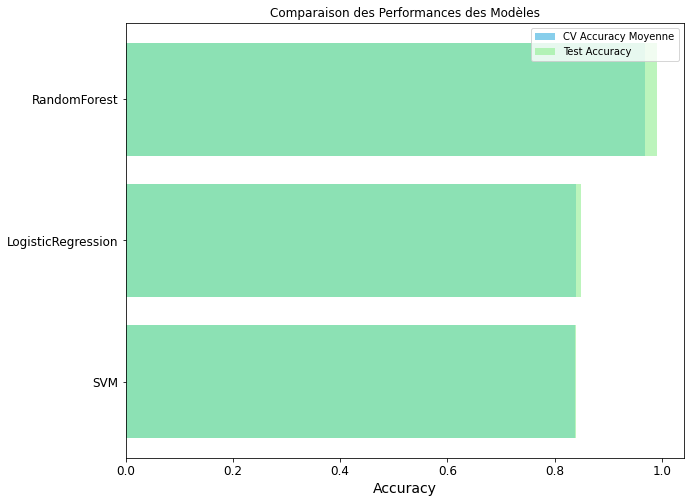

In [ ]:
# Noms des modèles
model_names = [model for model, _ in sorted_models]
# Performances des modèles
cv_means = [performance['CV_Accuracy_Mean'] for _, performance in sorted_models]
test_accuracies = [performance['Test_Accuracy'] for _, performance in sorted_models]

# Création du graphique à barres pour la précision moyenne de CV
plt.figure(figsize=(10, 8))
plt.barh(model_names, cv_means, color='skyblue', label='CV Accuracy Moyenne')
plt.barh(model_names, test_accuracies, color='lightgreen', label='Test Accuracy', alpha=0.6)
plt.xlabel('Accuracy')
plt.title('Comparaison des Performances des Modèles')
plt.legend()
plt.gca().invert_yaxis()  
plt.show()


## Model Arbre de décision

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train) 
dt_predictions = dt_model.predict(x_test)
cv_scores_dt = cross_val_score(dt_model, x_train, y_train, cv=5, scoring='accuracy')

In [ ]:

print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

model_performance['DecisionTree'] = {
    'CV_Accuracy_Mean': cv_scores_dt.mean(),
    'CV_Accuracy_Std': cv_scores_dt.std(),
    'Test_Accuracy': accuracy_score(y_test, dt_predictions),
    'ConfusionMatrix': confusion_matrix(y_test, dt_predictions),
    'ClassificationReport': classification_report(y_test, dt_predictions)
}


Accuracy: 0.9580498866213152
Confusion Matrix:
 [[719  21]
 [ 16 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       740
           1       0.86      0.89      0.87       142

    accuracy                           0.96       882
   macro avg       0.92      0.93      0.92       882
weighted avg       0.96      0.96      0.96       882

